In [10]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier

In [11]:
file_path = 'datasets/The titanic dataset.csv'
df = pd.read_csv(file_path)
df = df[['pclass', 'gender', 'family', 'embarked', 'survived']]

df = df[df.isna().any(axis=1) == False]
df.head()

,pclass,gender,family,embarked,survived
2,3,male,2.0,S,0
4,3,female,2.0,S,1
5,3,female,0.0,S,1
6,3,male,0.0,S,1
7,2,male,1.0,C,0


In [12]:
X = df[['pclass', 'gender', 'family', 'embarked']]  # Features (all columns except the survived)
y = df['survived']   # Target variable

X['gender'] = X['gender'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X.head()

/var/folders/yt/ljnl7_9n7ngd_hbytypzcjyw0000gn/T/ipykernel_98227/3350034170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].map({'male': 0, 'female': 1})
/var/folders/yt/ljnl7_9n7ngd_hbytypzcjyw0000gn/T/ipykernel_98227/3350034170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


,pclass,gender,family,embarked
2,3,0,2.0,0
4,3,1,2.0,0
5,3,1,0.0,0
6,3,0,0.0,0
7,2,0,1.0,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from OneRule import OneRuleClassifier
from NaiveBayes import NaiveBayesClassifier
from DecisionTree import DecisionTreeClassifier
from KNN import KNNClassifier

clfs = [(OneRuleClassifier(), '1R-my'), (NaiveBayesClassifier(), 'NB-my'), 
        (DecisionTreeClassifier(), 'DT-my'), (KNNClassifier(k=3, weights=False), 'KNN-my'), (CategoricalNB(), 'NB'), (DT(), 'DT'), (KNeighborsClassifier(n_neighbors=3, weights=None), 'KNN')]

In [14]:
fit_times = []
predict_times = []
accuracies = []
names = []

In [15]:
for (clf, name) in clfs:
    start_fit = time.time()
    clf.fit(X_train, y_train)
    end_fit = time.time()
    
    start_pred = time.time()
    y_pred = clf.predict(X_test)
    end_pred = time.time()
    
    accuracy1 = accuracy_score(np.array(y_test), np.array(y_pred))
    
    fit_times.append(end_fit - start_fit)
    predict_times.append(end_pred - start_pred)
    accuracies.append(accuracy1)
    names.append(name)
    
    print(f"Model {name} | Accuracy: {accuracy1:.4f} | Fit Time: {fit_times[-1]:.4f}s | Predict Time: {predict_times[-1]:.4f}s")

Model 1R-my | Accuracy: 0.8108 | Fit Time: 0.0007s | Predict Time: 0.0020s
Model NB-my | Accuracy: 0.8263 | Fit Time: 0.0020s | Predict Time: 0.0034s
Model DT-my | Accuracy: 0.8185 | Fit Time: 0.0507s | Predict Time: 0.0021s
Model KNN-my | Accuracy: 0.7992 | Fit Time: 0.0000s | Predict Time: 4.9375s
Model NB | Accuracy: 0.8263 | Fit Time: 0.0013s | Predict Time: 0.0004s
Model DT | Accuracy: 0.8185 | Fit Time: 0.0007s | Predict Time: 0.0002s
Model KNN | Accuracy: 0.7838 | Fit Time: 0.0005s | Predict Time: 0.0035s


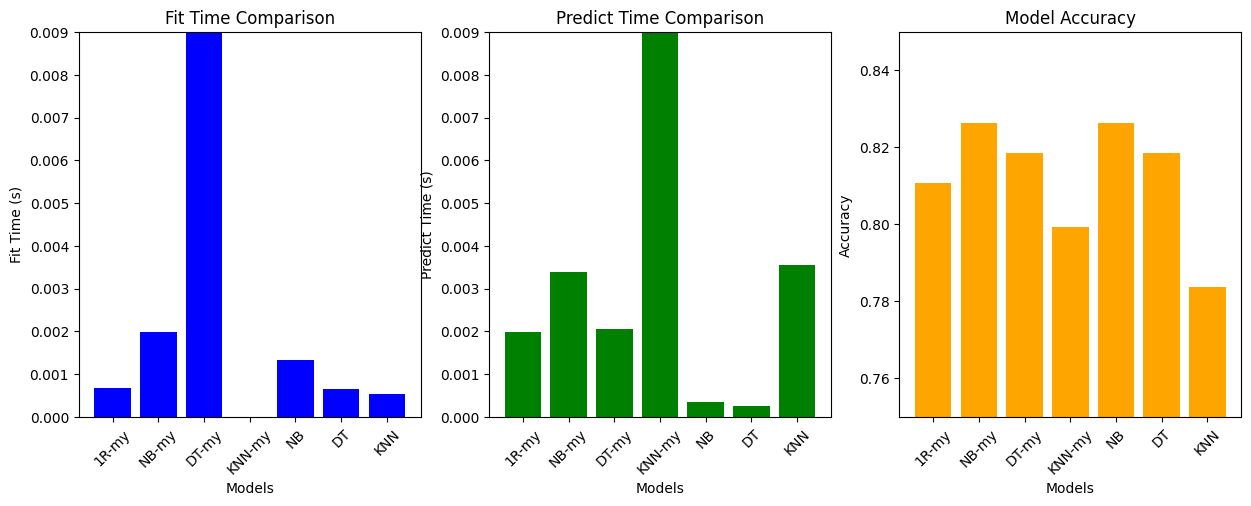

In [16]:
# Plotting fit and predict times
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(names, fit_times, color='blue')
plt.xlabel("Models")
plt.ylabel("Fit Time (s)")
plt.title("Fit Time Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 0.009)

plt.subplot(1, 3, 2)
plt.bar(names, predict_times, color='green')
plt.xlabel("Models")
plt.ylabel("Predict Time (s)")
plt.title("Predict Time Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 0.009)

# Accuracy Plot
plt.subplot(1, 3, 3)
plt.bar(names, accuracies, color='orange')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.75, 0.85)

# plt.tight_layout()
plt.show()